<a href="https://colab.research.google.com/github/Volks44/ML_Lab_Comp/blob/main/Competition_XGBoost_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score



---



# Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Laboratory/Competition/public_data.csv')
print(df.head())

   rowID  season  periodID  day_in_period  hour  minute  holyday  weekday  \
0      0       1        18              0     0       0    False        2   
1      1       1        18              0     0      15    False        2   
2      2       1        18              0     0      30    False        2   
3      3       1        18              0     0      45    False        2   
4      4       1        18              0     1       0    False        2   

           ke      hupx  afrr_fel     afrr_le  mfrr_fel  mfrr_le        afrr  \
0  899.343121  287.7194    0.0000 -103.196933       0.0      0.0 -212.845947   
1  899.374587  287.7194   55.9286   -5.617200       0.0      0.0  263.427160   
2  899.303875  287.7194   69.6826   -9.355800       0.0      0.0  273.927320   
3  899.299787  287.7194   30.2718  -16.943567       0.0      0.0  132.621040   
4  897.436947  283.6309   25.9714  -12.064167       0.0      0.0  151.888080   

   solar_becsult_dayahead  rendszerterheles_terv  target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89760 entries, 0 to 89759
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rowID                   89760 non-null  int64  
 1   season                  89760 non-null  int64  
 2   periodID                89760 non-null  int64  
 3   day_in_period           89760 non-null  int64  
 4   hour                    89760 non-null  int64  
 5   minute                  89760 non-null  int64  
 6   holyday                 89760 non-null  bool   
 7   weekday                 89760 non-null  int64  
 8   ke                      71808 non-null  float64
 9   hupx                    71808 non-null  float64
 10  afrr_fel                71808 non-null  float64
 11  afrr_le                 71808 non-null  float64
 12  mfrr_fel                71808 non-null  float64
 13  mfrr_le                 71808 non-null  float64
 14  afrr                    71808 non-null

In [ ]:
np.unique(df['day_in_period'])

array([0, 1, 2, 3, 4])

In [ ]:
np.unique(df['target_flag'])

array([ 0.,  1., nan])

## Datasplit

In [ ]:
df1 = df[df['day_in_period'].isin([0, 1, 2, 3])]
df2 = df[df['day_in_period'] == 4]



---



## Feature Selection

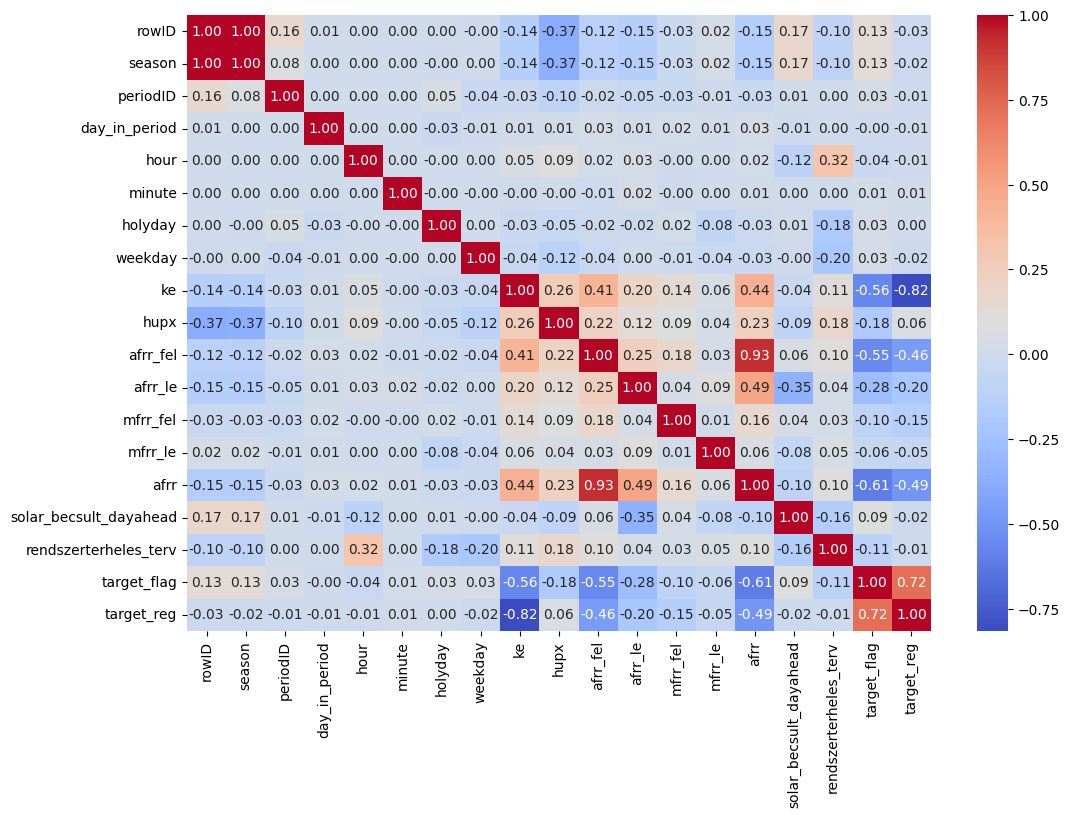

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
X = df1.drop(columns=['rowID','target_flag','target_reg'])
y = df1['target_flag']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                   Feature  Importance
7                       ke    0.641508
13                    afrr    0.117617
10                 afrr_le    0.084958
9                 afrr_fel    0.059244
8                     hupx    0.034422
0                   season    0.018227
15   rendszerterheles_terv    0.010940
1                 periodID    0.009265
3                     hour    0.006199
14  solar_becsult_dayahead    0.005517
6                  weekday    0.003880
4                   minute    0.003673
2            day_in_period    0.002860
11                mfrr_fel    0.000784
12                 mfrr_le    0.000566
5                  holyday    0.000340


In [ ]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe = rfe.fit(X, y)

print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['season', 'periodID', 'hour', 'ke', 'hupx', 'afrr_fel', 'afrr_le',
       'afrr', 'solar_becsult_dayahead', 'rendszerterheles_terv'],
      dtype='object')


In [ ]:
selected_features = X.columns[rfe.support_]

In [ ]:
# Assume selected features are stored in 'selected_features'
X = df1[selected_features]
y_flag = df1['target_flag']
y_reg = df1['target_reg']

# Split data for classification (target_flag)
X_train_flag, X_test_flag, y_train_flag, y_test_flag = train_test_split(X, y_flag, test_size=0.2, random_state=42)

# Split data for regression (target_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_flag, y_train_flag)

# Predict on test set
y_pred_flag = clf.predict(X_test_flag)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_flag, y_pred_flag))
print("Classification Report:\n", classification_report(y_test_flag, y_pred_flag))
print("Confusion Matrix:\n", confusion_matrix(y_test_flag, y_pred_flag))

Accuracy: 0.990112797660493
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4838
         1.0       0.99      0.99      0.99      9524

    accuracy                           0.99     14362
   macro avg       0.99      0.99      0.99     14362
weighted avg       0.99      0.99      0.99     14362

Confusion Matrix:
 [[4765   73]
 [  69 9455]]


In [ ]:
# Initialize and train the model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = reg.predict(X_test_reg)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))

Mean Absolute Error: 1.220106413184216
Mean Squared Error: 132.43793102895458
R^2 Score: 0.9979206027512351




---
# Time Series Prediction


'season', 'periodID', 'hour', 'ke', 'hupx', 'afrr_fel', 'afrr_le',
       'afrr', 'solar_becsult_dayahead', 'rendszerterheles_terv', 'target_flag', 'target_reg'

In [ ]:
!pip install xgboost --q

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

---
## 'hupx'


In [ ]:
features1 = ['season', 'periodID', 'hour', 'minute', 'holyday', 'weekday', 'solar_becsult_dayahead','rendszerterheles_terv']

In [ ]:
model.fit(df1[features1], df1['hupx'])

pred1 = model.predict(df2[features1])



---
## 'afrr_le'


In [ ]:
features2 = ['season', 'periodID', 'hour', 'minute', 'holyday', 'weekday', 'solar_becsult_dayahead','rendszerterheles_terv','hupx']

In [ ]:
model2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model2.fit(df1[features2], df1['afrr_le'])

pred2 = model2.predict(df2[features2])

---
## 'afrr_fel'

In [ ]:
features3 = ['season', 'periodID', 'hour', 'minute', 'holyday', 'weekday', 'solar_becsult_dayahead','rendszerterheles_terv','hupx','afrr_le']

In [ ]:
model3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model3.fit(df1[features3], df1['afrr_fel'])

pred3 = model3.predict(df2[features3])

---
## 'afrr'

In [ ]:
features4 = ['season', 'periodID', 'hour', 'minute', 'holyday', 'weekday', 'solar_becsult_dayahead','rendszerterheles_terv','hupx','afrr_le','afrr_fel']

In [ ]:
model4 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model4.fit(df1[features4], df1['afrr'])

pred4 = model4.predict(df2[features4])

---
## 'ke'



In [ ]:
features5 = ['season', 'periodID', 'hour', 'minute', 'holyday', 'weekday', 'solar_becsult_dayahead','rendszerterheles_terv','hupx','afrr_le','afrr_fel','afrr']

In [ ]:
model5 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model5.fit(df1[features5], df1['ke'])

pred5 = model5.predict(df2[features5])



---



In [ ]:
df2['ke'] = np.array(pred5)
df2['hupx'] = np.array(pred1)
df2['afrr_fel'] = np.array(pred3)
df2['afrr_le'] = np.array(pred2)
df2['afrr'] = np.array(pred4)

<ipython-input-30-e17651fd407d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ke'] = np.array(pred5)
<ipython-input-30-e17651fd407d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hupx'] = np.array(pred1)
<ipython-input-30-e17651fd407d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17952 entries, 384 to 89759
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rowID                   17952 non-null  int64  
 1   season                  17952 non-null  int64  
 2   periodID                17952 non-null  int64  
 3   day_in_period           17952 non-null  int64  
 4   hour                    17952 non-null  int64  
 5   minute                  17952 non-null  int64  
 6   holyday                 17952 non-null  bool   
 7   weekday                 17952 non-null  int64  
 8   ke                      17952 non-null  float32
 9   hupx                    17952 non-null  float32
 10  afrr_fel                17952 non-null  float32
 11  afrr_le                 17952 non-null  float32
 12  mfrr_fel                0 non-null      float64
 13  mfrr_le                 0 non-null      float64
 14  afrr                    17952 non-null  f



---
# Classification


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize and train the model
reg = RandomForestRegressor(random_state=42)
reg.fit(df1[selected_features], df1['target_reg'])

# Predict on test set
pred_reg = reg.predict(df2[selected_features])

In [ ]:
model6 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
model6.fit(df1[selected_features], df1['target_reg'])

pred_reg = model6.predict(df2[selected_features])

In [ ]:
df2['target_reg'] = np.array(pred_reg)

<ipython-input-35-a664e2198f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target_reg'] = np.array(pred_reg)


In [ ]:
selected_features2 = np.append(selected_features,
'target_reg'
)

In [ ]:
# Initialize and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(df1[selected_features2], df1['target_flag'])

# Predict on test set
pred_flag = clf.predict(df2[selected_features2])

In [ ]:
pred_flag

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
np.unique(pred_flag, return_counts=True)

(array([0., 1.]), array([17917,    35]))

In [ ]:
df2['target_flag'] = np.array(pred_flag)

<ipython-input-40-dfc639db5c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target_flag'] = np.array(pred_flag)


In [ ]:
sol = df2[['rowID', 'target_flag']]

In [ ]:
sol.to_csv('result.csv', index=False)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df1[selected_features2])
X_test_scaled = scaler.transform(df2[selected_features2])

model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_scaled, df1['target_flag'])

predictions = model.predict(df2[selected_features2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, df1['target_flag'])
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  25.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  26.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  23.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  30.6s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  31.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  32.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  35.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  30.4s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  28.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   9.2s
[CV] END ..................C=0.1, gamma=scale, 

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df1[selected_features2])
X_test_scaled = scaler.transform(df2[selected_features2])

model = SVC(kernel='linear', C=10, gamma='scale')
model.fit(X_train_scaled, df1['target_flag'])

predictions = model.predict(df2[selected_features2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
np.unique(predictions)

array([0., 1.])

In [ ]:
df2['target_flag'] = np.array(predictions)

<ipython-input-38-ffeca8fbc3dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target_flag'] = np.array(predictions)


In [ ]:
sol = df2[['rowID', 'target_flag']]

In [ ]:
sol.to_csv('result.csv', index=False)